Завдання №1: Завантаження даних з файлу boston.csv
Дані з файлу boston.csv:
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  L

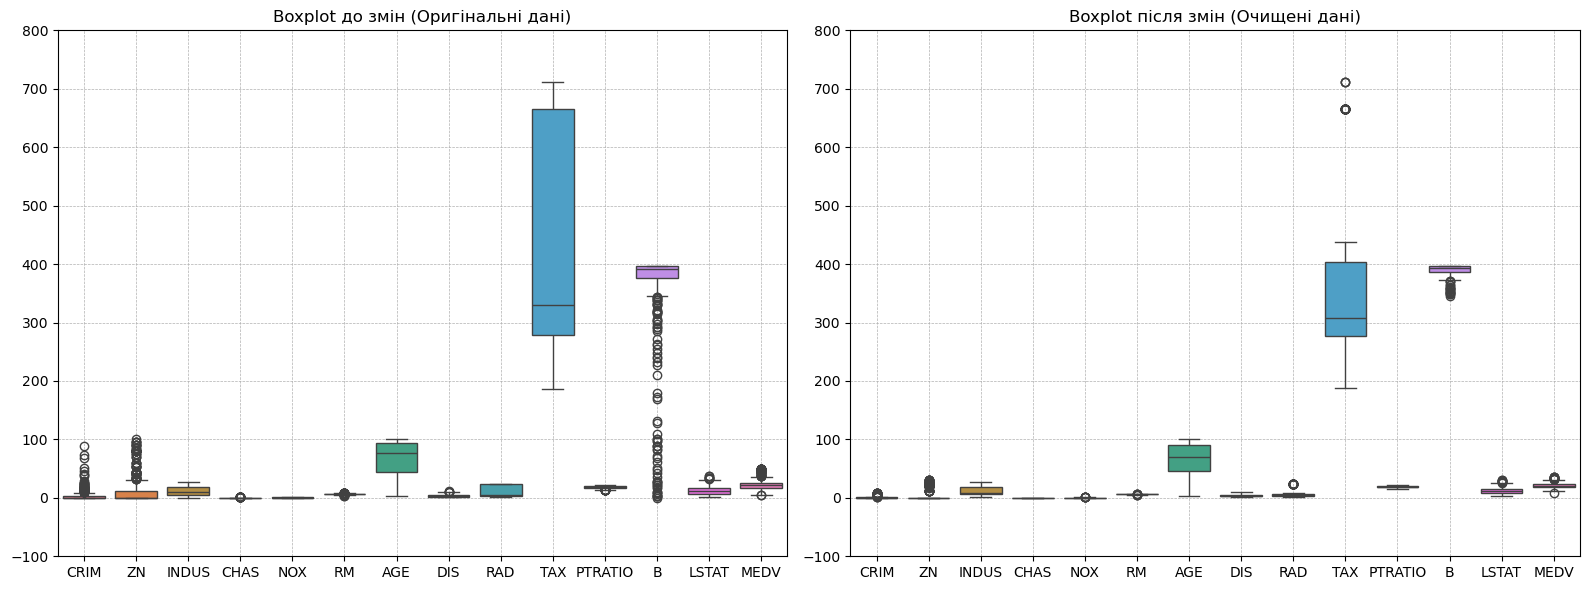

Завдання №7: Описова статистика очищених даних
             CRIM          ZN       INDUS   CHAS         NOX          RM  \
count  268.000000  268.000000  268.000000  268.0  268.000000  268.000000   
mean     1.022245    3.942164   10.664888    0.0    0.534082    6.167108   
std      1.961044    8.687210    6.346300    0.0    0.097127    0.427216   
min      0.006320    0.000000    1.380000    0.0    0.409000    4.903000   
25%      0.086420    0.000000    5.860000    0.0    0.453000    5.890500   
50%      0.171565    0.000000    8.560000    0.0    0.520000    6.127000   
75%      0.596213    0.000000   18.100000    0.0    0.581000    6.422250   
max      8.716750   30.000000   27.740000    0.0    0.871000    7.416000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  268.000000  268.000000  268.000000  268.000000  268.000000  268.000000   
mean    66.038806    4.011724    7.011194  362.231343   18.802612  389.079813   
std     26.723486    1.76

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Завдання №1: Завантаження даних
print("Завдання №1: Завантаження даних з файлу boston.csv")
df = pd.read_csv("boston.csv")
print("Дані з файлу boston.csv:")
print(df)
print("\n" + "-"*50 + "\n")

# Завдання №2: Обчислення описової статистики
print("Завдання №2: Обчислення описової статистики")
print(df.describe())
print("\n" + "-"*50 + "\n")

# Завдання №3: Альтернативний масив та перевірка пропущених значень
print("Завдання №3: Альтернативний масив та перевірка пропущених значень")
df_alt = df.copy()
df_alt.loc[5:10, df.columns[0]] = np.nan  # Імітація пропущених значень
print("Кількість пропущених значень по стовпцях:")
print(df_alt.isnull().sum())
print("\n" + "-"*50 + "\n")

# Завдання №4: Заповнення пропущених значень
print("Завдання №4: Заповнення пропущених значень")
print("Заповнення NaN середнім значенням:")
print(df_alt.fillna(df_alt.mean()).head())
print("Заповнення NaN нулями:")
print(df_alt.fillna(0).head())
print("Заповнення NaN одиницями:")
print(df_alt.fillna(1).head())
print("\n" + "-"*50 + "\n")

# Завдання №5: Створення NaN у разі їх відсутності та повторне заповнення
print("Завдання №5: Створення NaN та повторне заповнення")
df_alt.iloc[20, 1] = np.nan  # Встановлюємо NaN у 20-му рядку, 2-му стовпці
print("Перші 25 рядків після введення NaN:")
print(df_alt.head(25))
print("Після заповнення NaN середнім значенням:")
print(df_alt.fillna(df_alt.mean()).head(25))
print("\n" + "-"*50 + "\n")

# Завдання №6: Пошук та видалення викидів із побудовою boxplot до та після
print("Завдання №6: Пошук та видалення викидів")

plt.figure(figsize=(16, 6))

ax1 = plt.subplot(1, 2, 1)
sns.boxplot(data=df)
ax1.set_title("Boxplot до змін (Оригінальні дані)")
ax1.grid(True, linestyle="--", linewidth=0.5)
ylim1 = ax1.get_ylim()
ax1.set_yticks(np.arange(math.floor(ylim1[0]/100)*100, math.ceil(ylim1[1]/100)*100 + 100, 100)) # Налаштування міток осі Y

# Видалення викидів за методом IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

ax2 = plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_df)
ax2.set_title("Boxplot після змін (Очищені дані)")
ax2.grid(True, linestyle="--", linewidth=0.5)
ylim2 = ax2.get_ylim()
ax2.set_yticks(np.arange(math.floor(ylim2[0]/100)*100, math.ceil(ylim2[1]/100)*100 + 100, 100))

plt.tight_layout()
plt.show()

# Завдання №7: Повторне обчислення описової статистики для очищених даних
print("Завдання №7: Описова статистика очищених даних")
print(filtered_df.describe())
print("\n" + "-"*50 + "\n")

# Завдання №8: Центрування та нормування даних
print("Завдання №8: Центрування та нормування даних")
df_centered = filtered_df - filtered_df.mean() # Зміщує середнє значення кожної колонки до нуля
df_normalized = df_centered / filtered_df.std() # Масштабує значення на основі стандартного відхилення
print("Дисперсія нормованих даних:")
print(df_normalized.var())
print("Сума нормованих даних:")
print(df_normalized.sum().sum())